# Imports

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy
import json
import pickle

In [23]:
from scipy.stats import linregress

# Data

In [3]:
data = pd.read_csv('../D_1_10/Data/laptopData_cleaned.csv')
data.head()

,Company,TypeName,OpSys,RAM_GB,GPU,GPU_Brand,CPU_model,CPU_GHz,Weight_KG,Price_Rupee,ScreenRes_width,ScreenRes_height,Inches,TouchScreen,Memory_Type1,Memory_Size1_GB,Memory_Type2,Memory_Size2_GB
0,Apple,Ultrabook,macOS,8,Intel Iris Plus Graphics 640,Intel,Intel Core i5,2.3,1.37,71378.6832,2560,1600,13.3,No,SSD,128,No second memory,0
1,Apple,Ultrabook,macOS,8,Intel HD Graphics 6000,Intel,Intel Core i5,1.8,1.34,47895.5232,1440,900,13.3,No,Flash Storage,128,No second memory,0
2,HP,Notebook,No OS,8,Intel HD Graphics 620,Intel,Intel Core i5 7200U,2.5,1.86,30636.0000,1920,1080,15.6,No,SSD,256,No second memory,0
3,Apple,Ultrabook,macOS,16,AMD Radeon Pro 455,AMD,Intel Core i7,2.7,1.83,135195.3360,2880,1800,15.4,No,SSD,512,No second memory,0
4,Apple,Ultrabook,macOS,8,Intel Iris Plus Graphics 650,Intel,Intel Core i5,3.1,1.37,96095.8080,2560,1600,13.3,No,SSD,256,No second memory,0


In [7]:
data.columns

Index(['Company', 'TypeName', 'OpSys', 'RAM_GB', 'GPU', 'GPU_Brand',
       'CPU_model', 'CPU_GHz', 'Weight_KG', 'Price_Rupee', 'ScreenRes_width',
       'ScreenRes_height', 'Inches', 'TouchScreen', 'Memory_Type1',
       'Memory_Size1_GB', 'Memory_Type2', 'Memory_Size2_GB'],
      dtype='object')

In [29]:
results = {}

In [55]:
with open('../Results/regressions.pkl', 'rb') as f:
    results = pickle.load(f)

# Functions

In [ ]:
def linreg(data: pd.DataFrame, x, y, model, results: dict, col_name: str) -> dict:
    if deepcopy(model).__name__ == 'linregress':
        slope, intercept, r_value, p_value, std_err = model(x=data[x], y=data[y])
        results[col_name] = {
            'model': deepcopy(model),
            'slope': slope,
            'intercept': intercept,
            'r_value': r_value**2,
            'p_value': p_value,
            'std_err': std_err
        }
    return results

In [ ]:
def results(data: pd.DataFrame, X, y, model, results: dict, col_name: str) -> dict:
    if deepcopy(model).__name__ == 'linregress':
        slope, intercept, r_value, p_value, std_err = model(x=data[X], y=data[y])
        results[col_name] = {
            'model': deepcopy(model),
            'slope': slope,
            'intercept': intercept,
            'r_value': r_value**2,
            'p_value': p_value,
            'std_err': std_err
        }
        return results
    elif deepcopy(model).__name__ == 'OLS':
        results[col_name] = {
            'model': deepcopy(model),
            'params': model.params,
            'rsquared': model.rsquared
        }
        return results
    elif deepcopy(model).__name__ == 'LinearRegression':
        x_x = data[X]
        yy = data[y]
        m = model()
        m.fit(x_x, yy)

        results[col_name] = {
            'model': deepcopy(model),
            'params': m.params,
            'rsquared': m.rsquared
        }
    else:
        return results

# 1) Simple linear Regression

## Experimental Regressions

In [12]:
lr_data = data[['Price_Rupee', 'Weight_KG']]
lr_data.head()

,Price_Rupee,Weight_KG
0,71378.6832,1.37
1,47895.5232,1.34
2,30636.0000,1.86
3,135195.3360,1.83
4,96095.8080,1.37


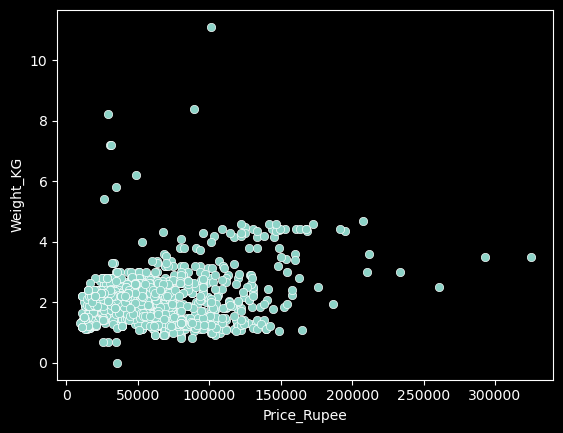

In [14]:
sns.scatterplot(data=lr_data, x='Price_Rupee', y='Weight_KG')
# plt.scatter(lr_data['Price_Rupee'], lr_data['Weight_KG'])
plt.show()

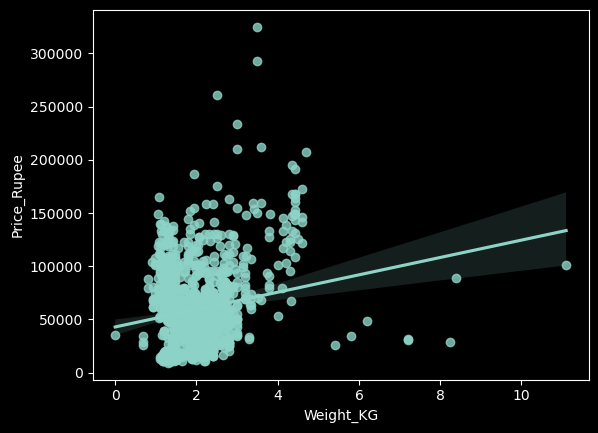

In [21]:
sns.regplot(data=lr_data, x='Weight_KG', y='Price_Rupee')
plt.show()

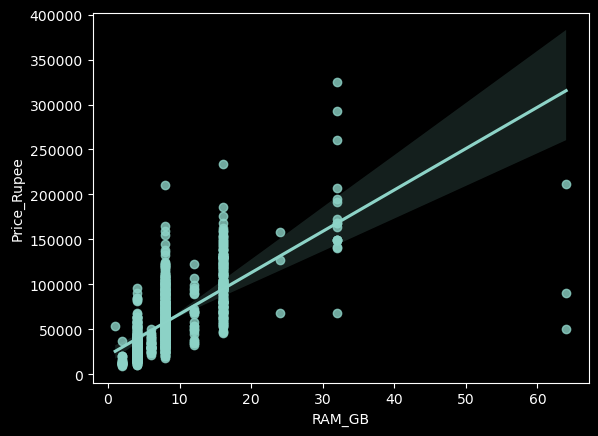

In [22]:
sns.regplot(data=data, x='RAM_GB', y='Price_Rupee')
plt.show()

## Parameters

In [ ]:
res = linreg(data, x='Price_Rupee', y='Weight_KG', model=linregress, results=results,
    col_name='lin_reg_Price_vs_Weight')
res

{'lin_reg_Price_vs_Weight': {'model': <function scipy.stats._stats_py.linregress(x, y=None, alternative='two-sided')>,
  'slope': np.float64(3.827186534615372e-06),
  'intercept': np.float64(1.8486478813549148),
  'r_value': np.float64(0.03122332399931279),
  'p_value': np.float64(2.2479309247907857e-10),
  'std_err': np.float64(5.984406531177486e-07)}}

In [56]:
res = linreg(data, x='Price_Rupee', y='RAM_GB', model=linregress, results=res,
    col_name='lin_reg_Price_vs_RAM')
res

{'lin_reg_Price_vs_Weight': {'model': <function scipy.stats._stats_py.linregress(x, y=None, alternative='two-sided')>,
  'slope': np.float64(3.827186534615372e-06),
  'intercept': np.float64(1.8486478813549148),
  'r_value': np.float64(0.03122332399931279),
  'p_value': np.float64(2.2479309247907857e-10),
  'std_err': np.float64(5.984406531177486e-07)},
 'lin_reg_Price_vs_RAM': {'model': <function scipy.stats._stats_py.linregress(x, y=None, alternative='two-sided')>,
  'slope': np.float64(0.00010250643606528087),
  'intercept': np.float64(2.324460610986348),
  'r_value': np.float64(0.471647088964016),
  'p_value': np.float64(5.108313310262993e-178),
  'std_err': np.float64(3.0456065397989975e-06)}}

In [57]:
with open('../Results/regressions.pkl', 'wb') as f:
    pickle.dump(res, f)

# 2) Multiple Linear Regression

# 3) Polynomial Regression

# 4) Regularized Regression

# 5) Log-Transformed Regression

# 6) Interaction Models

# 7) Categorical Encoding Regressions

# 8) Tree-Based Regression (beyond OLS)

# 9) Quantile Regression

# 10) Stepwise Model Comparison